In [3]:
import tweepy as tw
from tweepy import OAuthHandler
import csv
import urllib
from pprint import pprint
import pandas as pd
import json

In [5]:
# Authentication
consumer_key = 'pGxQmeYegW9dUPFDWsv4xNOaA'
consumer_secret = 'jsArZuECRwAxbzUR4sI91Flg3LksoUfyNdk3Gpy89ZgWVK9Kws'
access_token = '2995823048-ewIZ9sPsO1JgaK0kTtthbIoJHGAYhVPqH5z0lMQ'
access_secret = 'KPjfE2Kher45CniPbPgznMquPIwe0xwCYb7Lg2cyngB60'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Search Twitter for tweets

In [11]:
# Define the search term and the date_since date as variables
search_words = "talabat"
date_since = "2020-3-1"
date_until = "2020-3-1"

In [13]:
# To Keep or Remove Retweets
new_search = search_words + " -filter:retweets"
new_search

'talabat -filter:retweets'

In [14]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       until=date_until).items(1000)
count = 0
data_list = []
for tweet in tweets:
    print(tweet.text)
    print(tweet.favorite_count)
    print(tweet.retweet_count)
    print(tweet.created_at)
    count = count + 1
    data_list.append({
    'Text' : tweet.text,
    'Favorite_count' : tweet.favorite_count,
    'Retweet_count' : tweet.retweet_count,
    'Date created' : str(tweet.created_at)
    })
    
with open('temporary.json', 'w') as outfile:
    json.dump(data_list, outfile,indent = 3)    
print(count)

0


### Who is Tweeting About Wildfires?

ou can access a wealth of information associated with each tweet. 

Below is an example of accessing the users who are sending the tweets related to #wildfires and their locations. 

Note that user locations are manually entered into Twitter by the user. Thus, you will see a lot of variation in the format of this value.

- **tweet.user.screen_name** provides the user's twitter handle associated with each tweet.
- **tweet.user.location** provides the user's location indicated in her/his profile.

You can experiment with other items available within each tweet by typing tweet. and using the tab button to see all of the available attributes stored.


In [28]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['SDSPaul_T', 'Biddisham, England'],
 ['Phing7464', 'North Carolina, USA'],
 ['SHS_Space', ''],
 ['gomurciaspain', 'Spain'],
 ['FirehouseNews', '']]

### Create a Pandas Dataframe From a List of Tweet Data

In [31]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,SDSPaul_T,"Biddisham, England"
1,Phing7464,"North Carolina, USA"
2,SHS_Space,
3,gomurciaspain,Spain
4,FirehouseNews,


### Customizing Twitter Queries

you can customize your Twitter search queries by following the [Twitter API documentation](https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/standard-operators).

For instance, if you search for "climate+change", Twitter will return all tweets that contain both of those words (in a row) in each tweet.

The code below creates a list that can be queried using Python indexing to return the first five tweets.

In [33]:
new_search = "climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(1000)

for tweet in tweets:
    print(tweet.text)


@MommaKingMWD @funder Yeah...and you can find scientists who don't agree with climate change. They chose to present… https://t.co/aWDYRHJANj
Good to see concerns of councils being investigated - as we are on the frontline of delivery in these unprecedented… https://t.co/4Pc0Qr1vGG
https://t.co/KQcB0Emj8c should establish body like the climate change committee that reports independently to gover… https://t.co/B8njk3fQs7
Brilliant thread; I wonder if the BLM/Climate Change/vaccines scams are the last ‘throws of the dice’ for the elite… https://t.co/OTGfPC0sXA
And hence, nobody realises the importance of climate change. These chapters have always been put at the end, and ne… https://t.co/Uz65CoYRQP
@ciaocoulo I do think yes due to economic implication of climate change
@democracynow 2038? That is a real catastrophe! When the richest nation in Europe has such a feeble, lazy response… https://t.co/CK4mTmtCJ3
@JusticeHorn_ @EricWBunch @KCMO Hmmm I would to speak with you in regards to climat

First look at @heydaysoslo new identity for Chooose – they make it easy for both companies and individuals to act o… https://t.co/cP24SILEJo
@morrin28 @Nigel_Farage No it’s not... climate change, pandemic,  brexit they are major crisis.  This is just humanity.
@wef Oh God! This is so scary “The warming trend at the south pole is much larger than at other stations, but this… https://t.co/ynji21RCrU
@wef At climate change action East Africa we know that there is no future with no trees, so our tree planting of fr… https://t.co/GYxsj6AgJ6
@ChrisGPackham All great points. I don't think future generations are going to care about that half hour saved by H… https://t.co/ecZ6WOuGsn
how u tryna end climate change &amp; faithfully eating meat stupid bitch
it was 30°, sunny and humid as hell two days ago and today it's 20° and windy 😐 love climate change
If you are a libertarian free marketeer, have economic dependency on fossil fuel extraction or use, believe only Go… https://t.co/qMtGJ0Yfb4
Peo

@lfc10 @EuropeElects I think it's a party lead by Szymon Hołownia with focus on climate change.
The #pandemic has revealed deep flaws in the world’s food system and food leaders are calling for global coordinati… https://t.co/ByZcXpnXDK
@generalslug I hate to tell you that due to climate change, it is much smaller now
@HillaryClinton Gates meets world leaders around the globe. He is there for only two possible reasons: (1) pitch hi… https://t.co/nHK2h12hqQ
Increasing soil’s carbon content also protects against erosion and increases biodiversity. #ClimateChange… https://t.co/Uj5q9fqcyD
For the second consecutive year, forest fire activity is more than 22 times higher than in 2003-2018 in the Arctic… https://t.co/VfFVRUgXHP
Proud to be quoted in this article - and yes if we put action behind words - this is an amazing step @DanJoergensen… https://t.co/pnPtISXba1
By 2050 flooding annual losses are expected to increase by between 25-85% 

https://t.co/wnd0krGGR4

@floodre  #climatechange #

We are introducing the hashtag "Go Green with BMI" as an initiative for corporates around the world to grow along w… https://t.co/eEjRw2By0X
@MonicaLewinsky I thought this was about climate change, then I saw the name
@ChrisAnkTest @archer_rs Because french police or gendarmes love to pepper spray people ! They do that to child tha… https://t.co/356c0tPvQ9
@CavaggioniMario Central bank mandate includes climate change ?
The COVID-19 pandemic might make us rethink our tepid response to climate change. We are now painfully aware of wha… https://t.co/7Nl0dDevey
@NZStuffPolitics Great to see your party has really said what they really think about climate change… https://t.co/aVzW6x0Yyh
@bhascker_rm Normal climate change don't worry
@JoshFrydenberg Does your working together "NOW" include BLM, Climate Change, all religions, etc street protesters… https://t.co/TI20csePU2
COVID-19, violence and climate change: Lake Chad herders in distress https://t.co/TSFcTi2ADY https://t.co/B0Mn33dPQU
Covera

Combating climate change through environmental taxes — how to move forward by @EUauditors https://t.co/KtPG1cEBrj
What is the role of #historicbuildings in the EU strategy on adaptation to Climate Change? Have your say! The commi… https://t.co/vbCEOiyfwj
The meat and dairy industry is increasingly feeling the heat of climate change, but major companies are avoiding ad… https://t.co/zTe3rGcvh5
Sneak peek of our new series! 👀 

Will lockdowns make people more empathetic toward refugees and migrants? Full ser… https://t.co/gDCc5HoTIN
These 5 countries are home to more than half the world’s forests https://t.co/AOdeILvhQA #environment
It’s time to grieve the world we’ve lost to climate change—and start to move on https://t.co/nd5wR8BvPF https://t.co/EwikOAtLn6
Hotter World Will See 21% GDP Fall, India on "Ruinous Trajectory": Study https://t.co/mlXKQcv8O0
“We believe that the continued governmental inaction over the climate and ecological crisis now justifies peaceful… https://t.co/z677Y56

It’s time to grieve the world we’ve lost to climate change—and start to move on #popsci #sciencenow #sagesutr https://t.co/glqP9evqfB
The science has been settled to the highest degree, so now the key to progress is understanding our psychological r… https://t.co/NiSeCD7pvX
It's been two whole weeks since the launch of the #CountrysideClimateNetwork. 

Read Cllr @SteveCount, Leader of… https://t.co/vXz2RgxbUL
@BCU_BSoAD are proud to be part of this movement to address sustainability and climate change and @matjones_arch an… https://t.co/sr2oe6Kgti
The African Women’s Studies @uonbi will hold the 3rd Annual Conference on Status of African Women with the theme “W… https://t.co/1fzXxw5UFi
Doing my part to reverse climate change by becoming a spree shooter
Intense Arctic wildfires set a #pollution record 

Scientists note that while fires are part of the ecology of the… https://t.co/nNjSY0gi0V
Fire ants are headed north: Watch out for mounds, wear close-toed shoes and lose the shorts https

Check out my video urging the @TheDemocrats to make climate change a priority.  

As a Bernie delegate, I‘m pushing… https://t.co/AOihGxn7VG
Find out what communication lessons we can draw from COVID-19 to drive a global response to climate change. Registe… https://t.co/1yxnkrntCg
@mmpadellan Hey, not to be a downer, but we are still driving climate change towards making an inhospitable world for generations to come...
A look into the palm oil industry. How and why we as a species are having such a negative impact on the planet.

Ca… https://t.co/p0EsF9j2TH
Last year @PROMETEOPL won the @IBMDeveloper @CallforCode , creating a a wearable device to measure carbon monoxide,… https://t.co/DJWNdSpcPf
'Renewable' natural gas may sound green, but it's not an antidote for climate change https://t.co/Lbmb2noC1T via @ConversationUS
The law that could make climate change illegal https://t.co/RHFQ2qRjqV via @BBC_Future
Joe Biden Enlists Clinton/Obama Loyalist, Tom Steyer to Advise on Climate Chang

@NASAEarth @NASAClimate Climate Change is a serious threat to everyone and yet there has been very minimal efforts… https://t.co/XLo8MoaPUN
This is dangerous from Greenpeace. I know climate change but this is dangerous. They should be fined for this. Call… https://t.co/6cz31TKwxf
The best way to build resilience against future pandemics and the impact of climate change is to move to a… https://t.co/qChc1nuIQQ
TACKLING CLIMATE CHANGE ISSUES IN 2020

https://t.co/6xCyjG1XPr

#mbe #mbecanada #mansoorbrothersenterprises… https://t.co/DMMteh9jLD
@MrKRudd Kevie...Victoria is out of control...won't effect you in the beachfront mansion...only climate change will hey...hypocrite
I really appreciate @MikeHudema 's mix of communicating the grounding reality of the climate crisis while sharing e… https://t.co/HoL2gxcO5a
Reviewing drug harms without looking at legislation like 'commissioning a report on climate change, but telling inv… https://t.co/54OrCFJRZa
Hotter World Will See 21% GDP Fall, Ind

Bridging the gap between climate data and needs of financial institutions via ⁦@CICERO_klima⁩ ⁦@SasjaBeslik⁩ ⁦… https://t.co/ZhbrlyPpiI
The potential impact of whales 🐳 on curbing climate change is frankly astonishing. https://t.co/KhmS63KFkt
George McInerney likes this: 👍How to tackle climate change, food security and land degradation https://t.co/ZvIwOBevYg
George McInerney likes this: 👍Climate change may cause extreme waves in Arctic https://t.co/1BI6Zzo7IS
@ezraklein A must read article. The worst dry spring ever in Europe, failed sowing season, and after 2 weeks of rai… https://t.co/MOH12H4Vc1
@jrolivier1 No! Think about it, if all presidents were scientists COVID-19 would have been contained on time, Clima… https://t.co/EH0x6sztxp
"Without Historical Precedent": Climate Change Turns Lakes Green In US  https://t.co/xDsatBZ04q
Health warning: The article being promoted by this BBC journalist has been found to present "a mix of out-of-contex… https://t.co/R3Z1TqE4pJ
Genius at @NDTV 

The UK's Spectator magazine is notorious for its poor quality &amp; misleading coverage on climate change. Now they've… https://t.co/XHOECWtbP9
So @BBCr4today allowed both speakers to advocate NI being axed to “create jobs” with no counter argument.
Remember… https://t.co/KyIny1JwUi
@PrisonPlanet Says the person who isn’t going to destroy the climate change protests from the inside by
Clinton/Obama Official, Tom Steyer to Advise Biden on Climate Change https://t.co/2LS62fKKtw via @BreitbartNews Use… https://t.co/QHQDEq5Re3
The scariest thing about global warming (and Covid-19) https://t.co/4HVTaNUKKT via @voxdotcom
@xxwrayxx no that's my brain that's been rubbed smoothed by the history of agriculture and threat of mass famine du… https://t.co/49tXMyJPts
How the coronavirus pandemic is affecting plans to tackle the climate emergency in the UK https://t.co/MjZS1yeRZX
How the world’s most remote buildings can help us adapt to climate change https://t.co/5Sb6mYDqaa
In any case have you not

@Kidorry_ @fidel_Ke #NjiruGrabbers
The increase in land demand is driving land-grabs and catastrophic deforestation… https://t.co/ZWB3NsIJdc
In June, #Arctic fires released 59 million metric tons of planet-warming carbon dioxide, greater than all the carbo… https://t.co/MiZ0IiDLx7
@RehanaThowfeek wait are you saying that climate change is actually more important than the next general election a… https://t.co/j1KvajPSis
@MarkTLive 
Climate Change Question:
Is it possible that Covid has been here all along, but that the recent increas… https://t.co/uyLCOiTuAt
basically what she’s saying is my farts are contributing to climate change ❤️ https://t.co/ecN3ChtDBR
Up until now I have been neutral on climate change. Seeing the lies and scaremongering on the left over the last 3… https://t.co/TlaOJelyIR
the majority of modern society is run by authoritarian strongmen, the world going to end in the next 20 years due t… https://t.co/omDfI4bsym
Make science great again -

As the climate crisis bec

CDP launches climate 'temperature rating' system for investors - Reuters via @chosennews_237  https://t.co/C13cE65qp8
@TrishCharter That Steggall chook, has been very quiet since the virus over-ran her Climate change BS.
@yesnicksearcy And "climate change."
Fascinating evidence of landslides causing earthquakes. Given climate change is going lead to more extreme weather… https://t.co/WYp9MXpRtF
I beg to disagree, It’ll be hard to get used to 180 mph winds driving firestorms through cities with record numbers… https://t.co/ogeEtxQqLd
@GeraldLeroy6 @emconkwright What is your position on gun control, abortion, climate change?
Climate change and deforestation: These 3 supertrees can protect us from climate collapse https://t.co/a3qFeYW9nG
🇺🇸 Clean energy grids and electric vehicles key to beating climate change and air pollution

Yes, indeed they are.… https://t.co/91q2gttYGW
@TheRightMelissa @Rick_Q671 @realDonaldTrump The left are fine with the fact that “global warming” was changed to “

Hotter World Will See 21% GDP Fall, India on "Ruinous Trajectory": Study - NDTV https://t.co/AitW9loDGa
@biblioculus Solidarity. Change is difficult especially in our current climate. I hope things work out for you.
Joe Biden Enlists Clinton/Obama Loyalist, Tom Steyer to Advise on Climate Change https://t.co/l1ohyo4qiI https://t.co/hzHG4mIozN
@generator16 @maryldt @Fallable12 @BishopBarron @TaylorRMarshall I feel the same way about that but also climate ch… https://t.co/k8LVMwcIAx
Economic activity in sub-Saharan Africa can shrink by one percent in a month if the average temperature is 0.5 degr… https://t.co/XTRBQ2jvbA
@ProudSocialist Climate change is a hoax
Climate change is an urgent issue facing the world today, and we are committed to continuing to do our part to addr… https://t.co/jvzLwfX5PT
Inslee on Pandemic:

 Well... that’s news to me....I haven’t been briefed....Id this thing on?... I’d make a great… https://t.co/zOMCI6bZUk
Jane Goodall on conservation, climate change and CO

@ZubyMusic @ZubyMusic leftists don't blame Gov., we do. Big Gov. advocates  blame: racism, sexism, so-called system… https://t.co/rysomuVMCx
As the Climate Change Committee have made clear, there is no realistic scenario which allows the UK to hit its Net… https://t.co/dODIfcPbgt
@kizersosay28 @thispostisgood @AbortionSuicide That's because fundamentally they're very similar in policy, the onl… https://t.co/qPVJdliQQx
Intense Arctic Wildfires Set a Pollution Record https://t.co/LsGkrsYwHv
And then they wonder why ppl treat journalists economists and climate change experts with contempt

https://t.co/3ER4nTE41s
@GrrrGraphics Not my family.. as most of my family is either dead or old.. but I can’t say the same for my baby mam… https://t.co/sAdrjrL79C
@tiffanyyenn Oh man, I can’t even imagine what one million looks like in my head. Climate change truly is our biggest threat😭
@PeterFosterALP yes  equivalent to 1/1000th of a black lives matter march or 1/500th of a climate change march
We p

### Example:  Analyze Word Frequency Counts Using Twitter Data and Tweepy in Python

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
# re stands for regular expressions. 
# Regular expressions are a special syntax that is used to identify patterns in a string.
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [39]:
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

In [41]:
all_tweets[:5]

["'Australia’s failure to satisfy its international human rights obligations to take measures to prevent immediate an… https://t.co/4hc6W5FVLK",
 '“Climate change is already harming human rights in Australia, including the rights to life, health, food, water, ho… https://t.co/o0M8fynZds',
 '“Indigenous peoples in Australia are especially vulnerable to the impacts of climate change because of their deep c… https://t.co/Py6pxoJJsY',
 'Now that everyone seems to understand the urgency of addressing Climate Change, I would like to tell the story of h… https://t.co/me5YnL051u',
 '#Climate change mitigation #agroecological zone of high Savannah (Cameroon). Taking parameters to asses the quantit… https://t.co/DsujPyK4ZU']

#### Remove URLs (links)

The tweets above have some elements that you do not want in your word counts. For instance, URLs will not be analyzed in our scenario. You can remove URLs (links) using regular expressions accessed from the `re` package.

Here is an example: The syntax below tells the search to find all strings that look like a URL, and replace it with nothing – "". It also removes other punctionation including hashtags - #.

`([^0-9A-Za-z \t])|(\w+:\/\/\S+)`


`re.sub` allows you to substitute a selection of characters defined using a regular expression, with something else.

In the function defined below, this line takes the text in each tweet and replaces the URL with "" (nothing):

`re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet`


In [42]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

After defining the function, you can call it in a list comprehension to create a list of the clean tweets.

In [43]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Australias failure to satisfy its international human rights obligations to take measures to prevent immediate an',
 'Climate change is already harming human rights in Australia including the rights to life health food water ho',
 'Indigenous peoples in Australia are especially vulnerable to the impacts of climate change because of their deep c',
 'Now that everyone seems to understand the urgency of addressing Climate Change I would like to tell the story of h',
 'Climate change mitigation agroecological zone of high Savannah Cameroon Taking parameters to asses the quantit']

#### Text Cleanup - Address Case Issues

Capitalization is also a challenge when analyzing text data. If you are trying to create a list of unique words in your tweets, words with capitalization will be different from words that are all lowercase.



In [44]:
# Note how capitalization impacts unique returned values
ex_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Get unique elements in the list
set(ex_list)
{',', 'Dog', 'cat', 'dog'}

{',', 'Dog', 'cat', 'dog'}

To account for this, you can make each word lowercase using the string method `.lower()`. In the code below, this method is applied using a list comprehension.

In [45]:
# Note how capitalization impacts unique returned values
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case
['dog', 'dog', 'dog', 'cat', 'cat', ',']

['dog', 'dog', 'dog', 'cat', 'cat', ',']

Now all of the words in your list are lowercase. You can again use `set()` function to return only unique words.

In [46]:
# Now you have only unique words
set(lower_case)
{',', 'cat', 'dog'}

{',', 'cat', 'dog'}

#### Create List of Lower Case Words from Tweets
Right now, you have a list of lists that contains each full tweet and you know how to lowercase the words.

However, to do a word frequency analysis, you need a list of all of the words associated with each tweet. You can use `.split()` to split out each word into a unique element in a list, as shown below.

In [47]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['australias',
  'failure',
  'to',
  'satisfy',
  'its',
  'international',
  'human',
  'rights',
  'obligations',
  'to',
  'take',
  'measures',
  'to',
  'prevent',
  'immediate',
  'an'],
 ['climate',
  'change',
  'is',
  'already',
  'harming',
  'human',
  'rights',
  'in',
  'australia',
  'including',
  'the',
  'rights',
  'to',
  'life',
  'health',
  'food',
  'water',
  'ho']]

#### Calculate and Plot Word Frequency

To get the count of how many times each word appears in the sample, you can use the built-in Python library `collections`, which helps create a special type of a Python dictonary. The `collection.Counter` object has a useful built-in method `most_common` that will return the most commonly used words and the number of times that they are used.

To begin, flatten your list, so that all words across the tweets are in one list.

In [10]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

NameError: name 'itertools' is not defined

Based on the counter, you can create a Pandas Dataframe for analysis and plotting that includes only the top 15 most common words.

In [51]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,climate,677
1,the,534
2,change,491
3,to,401
4,of,284


Using this Pandas Dataframe, you can create a horizontal bar graph of the top 15 most common words in the tweets as shown below.

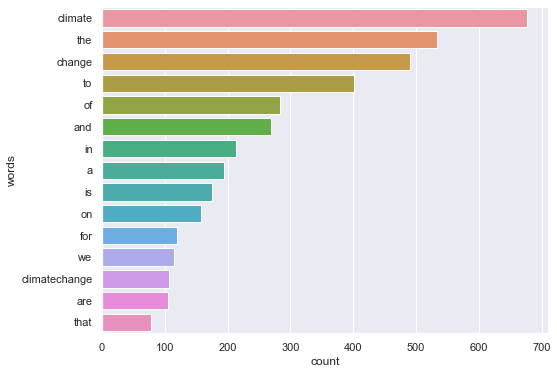

In [62]:
# Using seaborn
# increase the size of the figure
sns.set(rc={'figure.figsize':(8,6)})
# create the barplot
ax = sns.barplot(x="count", y="words", orient='h', data=clean_tweets_no_urls)

This plot displays the frequency of all words in the tweets on climate change, after URLs have been removed.

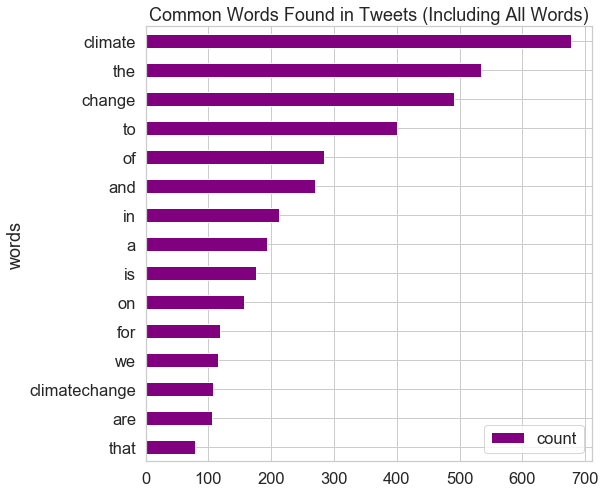

In [59]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

#### Remove Stopwords with `nltk`

In addition to lowercase words, you may also want to perform additional clean-up, such as removing words that do not add meaningful information to the text you are trying to analysis. These words referred to as **stop words** and include commonly appearing words such as a, the, of, in, who, what, you, etc.

The Python package nltk, commonly used for text analysis, provides a list of "stop words" that you can use to clean your Twitter data.

In [2]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [1]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

NameError: name 'stopwords' is not defined

Notice that the stop words provided by nltk are all lower-case. This works well given you already have converted all of your tweet words to lower case using the Python string method `.lower()`.

Next, you will remove all stop words from each tweet. 

In [8]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

NameError: name 'words_in_tweet' is not defined

Again, you can flatten your list and create a counter to return the most commonly used words and the number of times that they are used.

In [66]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('climate', 677),
 ('change', 491),
 ('climatechange', 107),
 ('new', 53),
 ('global', 49),
 ('science', 46),
 ('amp', 46),
 ('environment', 40),
 ('energy', 40),
 ('globalwarming', 35),
 ('links', 34),
 ('world', 31),
 ('make', 29),
 ('covid19', 29),
 ('report', 28)]

Then, you can create the Pandas Dataframe and plot the word frequencies without the stop words.

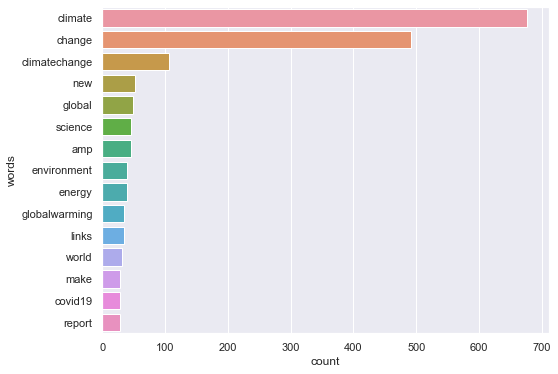

In [67]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

# create the barplot
ax = sns.barplot(x="count", y="words", orient='h', data=clean_tweets_nsw)


This plot displays the frequency of the words in the tweets on climate change, after URLs and stop words have been removed.

#### Remove Collection Words
In additional to removing stopwords, it is common to also remove collection words. Collection words are the words that you used to query your data from Twitter.

In this case, you used "climate change" as a collection term. Thus, you can expect that these terms will be found in each tweet. This could skew your word frequency analysis.

In [7]:
collection_words = ['climatechange', 'climate', 'change']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

NameError: name 'tweets_nsw' is not defined

#### Calculate and Plot Word Frequency of Clean Tweets

Now that we have cleaned up your data, we are ready to calculate and plot the final word frequency results.

In [72]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,new,53
1,global,49
2,science,46
3,amp,46
4,environment,40


Text(0.5, 1.0, 'Common Words Found in Tweets (Without Stop or Collection Words)')

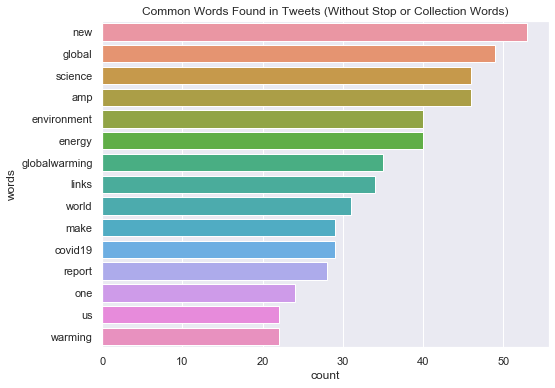

In [74]:
ax = sns.barplot(x="count", y="words", orient='h', data=clean_tweets_ncw)
ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

### Explore Co-occurring Words (Bigrams)

To identify co-occurrence of words in the tweets, you can use `bigrams` from nltk.

We first create a list of all bigrams (i.e. co-occurring words) in the tweets.

In [83]:
from nltk import bigrams

In [9]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

NameError: name 'tweets_nsw_nc' is not defined

We can now use a counter to capture the bigrams as dictionary keys and their counts are as dictionary values.

We begin by flattening the list of bigrams. We can then create the counter and query the top 20 most common bigrams across the tweets.

In [78]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('gpwx', 'globalwarming'), 14),
 (('global', 'warming'), 13),
 (('investor', 'ideas'), 11),
 (('cleantech', 'podcast'), 11),
 (('science', 'links'), 10),
 (('links', 'science'), 10),
 (('water', 'air'), 8),
 (('links', 'environment'), 8),
 (('environment', 'consumerism'), 8),
 (('consumerism', 'ecology'), 8),
 (('deserts', 'turning'), 8),
 (('turning', 'deserts'), 8),
 (('deserts', 'forests'), 8),
 (('rising', 'chance'), 8),
 (('chance', 'exceeding'), 8),
 (('exceeding', '15c'), 8),
 (('15c', 'global'), 8),
 (('global', 'target'), 8),
 (('could', 'make'), 7),
 (('environment', 'links'), 7)]

In [79]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(gpwx, globalwarming)",14
1,"(global, warming)",13
2,"(investor, ideas)",11
3,"(cleantech, podcast)",11
4,"(science, links)",10
5,"(links, science)",10
6,"(water, air)",8
7,"(links, environment)",8
8,"(environment, consumerism)",8
9,"(consumerism, ecology)",8


### Visualize Networks of Bigrams
We can now use the `bigram_df` Pandas Dataframe to visualize the top 20 occurring bigrams as networks using the Python package `NetworkX`.

In [81]:
import networkx as nx

In [82]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

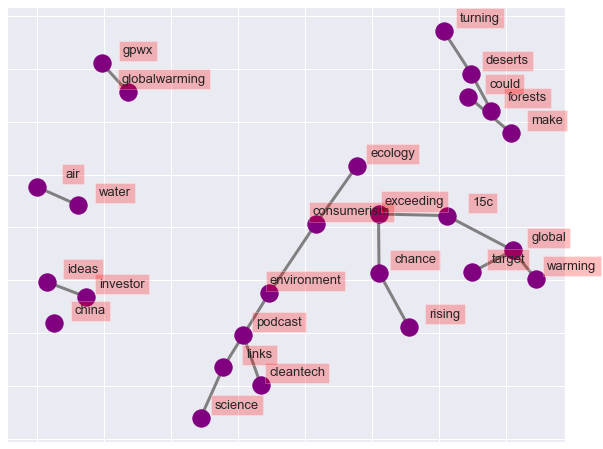

In [86]:
# Draw the network using NetworkX and matplotlib

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

This plot displays the networks of co-occurring words in tweets on climate change.

# Tweet Sentiment Analysis

We will use the Python package `textblob` to calculate the polarity values of individual tweets on climate change.

Please check the [textblob documentation](https://textblob.readthedocs.io/en/dev/quickstart.html) for more details.

In [90]:
!pip install textblob

     |████████████████████████████████| 636 kB 184 kB/s eta 0:00:01


In [91]:
from textblob import TextBlob

The `sentiment` property returns a namedtuple of the form `Sentiment(polarity, subjectivity)`. The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [99]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0].subjectivity , sentiment_objects[0]

(-0.10555555555555557,
 0.13333333333333333,
 TextBlob("Australias failure to satisfy its international human rights obligations to take measures to prevent immediate an"))

In [94]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[-0.10555555555555557,
 'Australias failure to satisfy its international human rights obligations to take measures to prevent immediate an']

In [95]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()


,polarity,tweet
0,-0.105556,Australias failure to satisfy its internationa...
1,0.000000,Climate change is already harming human rights...
2,-0.500000,Indigenous peoples in Australia are especially...
3,0.000000,Now that everyone seems to understand the urge...
4,0.160000,Climate change mitigation agroecological zone ...


These polarity values can be plotted in a histogram, which can help to highlight in the overall sentiment (i.e. more positivity or negativity) toward the subject.

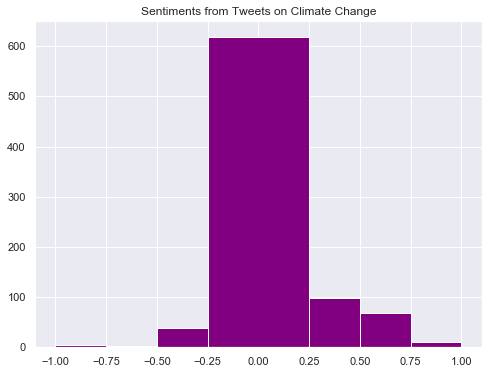

In [96]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

This plot displays a histogram of polarity values for tweets on climate change.

To get a better visual of the polarit values, it can be helpful to remove the polarity values equal to zero and create a break in the histogram at zero.

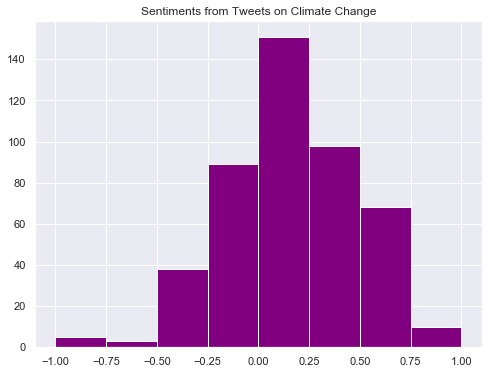

In [97]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

This plot displays a revised histogram of polarity values for tweets on climate change. For this histogram, polarity values equal to zero have been removed, and a break has been added at zero, to better highlight the distribution of polarity values.

Based on this histogram, would you say that the sentiments from the Climate Change tweets are more positive or negative?

Based on this histogram, would you say that the sentiments from the Climate Change tweets are more positive or negative